#Spaceship Titanic


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
%matplotlib inline
d = pd.read_csv('/content/drive/MyDrive/Spaceship Titanic/train.csv')
d.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Tamaño del csv

In [ ]:
d.shape

(8693, 14)

Valores faltantes

In [ ]:
k = d.isna().sum()
k[k!=0]

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
dtype: int64

Variable Objetivo

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


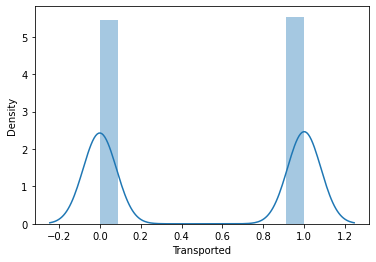

In [ ]:
sns.distplot(d['Transported'])

In [ ]:
list(d.columns)

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Name',
 'Transported']

In [ ]:
for c in d.columns:
    print ("%20s"%c, d[c].dtype)

         PassengerId object
          HomePlanet object
           CryoSleep object
               Cabin object
         Destination object
                 Age float64
                 VIP object
         RoomService float64
           FoodCourt float64
        ShoppingMall float64
                 Spa float64
              VRDeck float64
                Name object
         Transported bool


Inspección numerica de las columnas

In [ ]:
d._get_numeric_data().describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


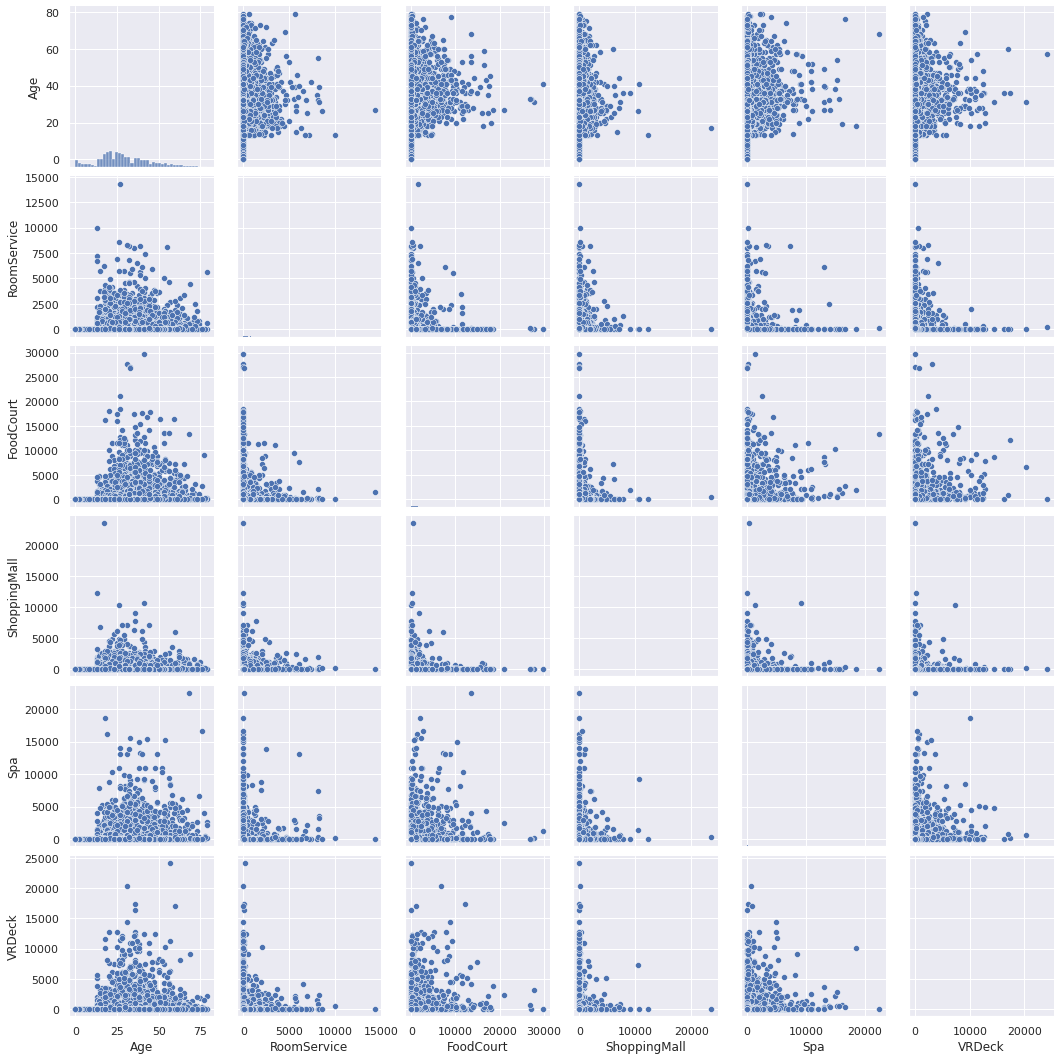

In [ ]:
cols=['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
#cols = np.unique(list(np.random.permutation(d._get_numeric_data().columns)[:5]))
sns.set()
sns.set()
sns.pairplot(d[cols])

correlaciones

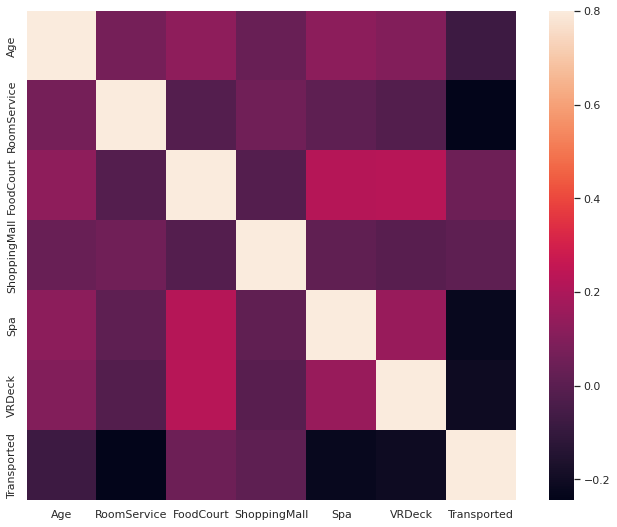

In [ ]:
corrmat = d.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

Inspeccion de variables categoricas

In [ ]:
ccols = [i for i in d.columns if not i in d._get_numeric_data()]
ccols

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Name']

In [ ]:
for c in ccols:
    print ("%10s"%c, np.unique(d[c].dropna()))

PassengerId ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']
HomePlanet ['Earth' 'Europa' 'Mars']
 CryoSleep [False True]
     Cabin ['A/0/P' 'A/0/S' 'A/1/S' ... 'T/2/P' 'T/2/S' 'T/3/P']
Destination ['55 Cancri e' 'PSO J318.5-22' 'TRAPPIST-1e']
       VIP [False True]
      Name ['Aard Curle' 'Aarjel Jaff' 'Aarjel Rhuba' ... 'Zosmas Mormonized'
 'Zubeneb Flesping' 'Zubeneb Pasharne']


In [ ]:
c="Destination"
d[c].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

Datos faltantes por columna

In [ ]:
k = d.isna().sum()
k[k!=0]

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
dtype: int64

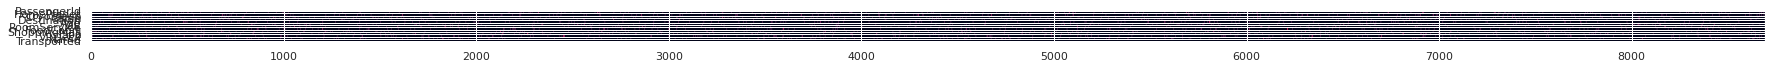

In [ ]:
ax = plt.figure(figsize=(30,15)).add_subplot(111)
ax.imshow(d.isna().values.T)
ax.set_aspect(12)
plt.yticks(range(d.shape[1]), d.columns);